In [1]:
#Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from data_cleaning.country_match import country_code_map as geomap
from data_cleaning import cleaning_utilities

## Importing and Combining Data
The following code imports the (cleaned) individual datasets and subsequently creates a single Pandas dataframe combining the data from all six data sets.

In [2]:
def combine_data(*dfs):
    '''
    Combines multiple dataframes into a single Pandas dataframe
    :param dfs - a comma separated collection of dataframes
    :return a new Pandas dataframe with all dataframes combined

    '''
    dfs = list(dfs) #Convert to list
    
    df = dfs[0].copy() #Extract first element
    
    #Add remaining elements
    for dataframe in dfs[1:]:
        df = df.append(dataframe, ignore_index=True)
    
    return df

In [3]:
df_1998 = pd.read_csv('../data/clean/1998_Election_Data.csv')
df_2002 = pd.read_csv('../data/clean/2002_Election_Data.csv')
df_2006 = pd.read_csv('../data/clean/2006_Election_Data.csv')
df_2010 = pd.read_csv('../data/clean/2010_Election_Data.csv')
df_2014 = pd.read_csv('../data/clean/2014_Election_Data.csv')
df_2018 = pd.read_csv('../data/clean/2018_Election_Data.csv')
df_2018

,Unnamed: 0,election_year,election_round,place_(zz_=_exterior),municipality_code,municipality_name,office,party_number,party_initials,party_name,number_of_votes
0,0,2018,1,ZZ,11266,ESTADOS UNIDOS,Presidente,17,PSL,PARTIDO SOCIAL LIBERAL,2609
1,1,2018,1,ZZ,98540,CHINA,Presidente,17,PSL,PARTIDO SOCIAL LIBERAL,103
2,2,2018,1,ZZ,98086,EGITO,Presidente,17,PSL,PARTIDO SOCIAL LIBERAL,21
3,3,2018,1,ZZ,11568,URUGUAI,Presidente,17,PSL,PARTIDO SOCIAL LIBERAL,8
4,4,2018,1,ZZ,29378,SERVIA,Presidente,17,PSL,PARTIDO SOCIAL LIBERAL,12
...,...,...,...,...,...,...,...,...,...,...,...
1534,1534,2018,1,ZZ,11142,ARGENTINA,Presidente,19,PODE,PODEMOS,46
1535,1535,2018,1,ZZ,11266,ESTADOS UNIDOS,Presidente,54,PPL,PARTIDO PATRIA LIVRE,4
1536,1536,2018,1,ZZ,11266,ESTADOS UNIDOS,Presidente,19,PODE,PODEMOS,39
1537,1537,2018,1,ZZ,11282,FRANCA,Presidente,19,PODE,PODEMOS,30


In [4]:
#Create Combined Data Frame (all years)
df_combined = combine_data(df_1998, df_2002, df_2006, df_2010, df_2014, df_2018)
print("Aggregate Data")
df_combined

Aggregate Data


,Unnamed: 0,election_year,election_round,place_(zz_=_exterior),municipality_code,municipality_name,office,party_initials,party_number,party_name,number_of_votes,unnamed:_4
0,0,1998,1,ZZ,98787,AFRICA DO SUL,PRESIDENTE,PSDC,27,PARTIDO SOCIAL DEMOCRATA CRISTAO,1,NaN
1,1,1998,1,ZZ,98787,AFRICA DO SUL,PRESIDENTE,PT do B,70,PARTIDO TRABALHISTA DO BRASIL,3,NaN
2,2,1998,1,ZZ,98787,AFRICA DO SUL,PRESIDENTE,PT,13,PARTIDO DOS TRABALHADORES,10,NaN
3,3,1998,1,ZZ,98787,AFRICA DO SUL,PRESIDENTE,PSDB,45,PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,54,NaN
4,4,1998,1,ZZ,11100,ALEMANHA,PRESIDENTE,PTN,19,PARTIDO TRABALHISTA NACIONAL,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5592,1534,2018,1,ZZ,11142,ARGENTINA,Presidente,PODE,19,PODEMOS,46,NaN
5593,1535,2018,1,ZZ,11266,ESTADOS UNIDOS,Presidente,PPL,54,PARTIDO PATRIA LIVRE,4,NaN
5594,1536,2018,1,ZZ,11266,ESTADOS UNIDOS,Presidente,PODE,19,PODEMOS,39,NaN
5595,1537,2018,1,ZZ,11282,FRANCA,Presidente,PODE,19,PODEMOS,30,NaN


In [5]:
def plot_total_votes(df):
    '''
    Plots the Total Brazilian Immigrant Electorate by Year
    :param df - A pandas dataframe containing electorate data with all years labelled
    '''
    #Source for Bar Chart- https://www.pythoncharts.com/matplotlib/beautiful-bar-charts-matplotlib/
    
    #Gets Quantity of Voters By Year
    voters = df[["election_year", "number_of_votes"]].groupby("election_year").sum()
    
    # Set default figure size.
    plt.rcParams['figure.figsize'] = (10,8)
    
    #Plot Graph
    plt.bar(
        x=np.arange(voters.size),
        height=voters["number_of_votes"],
        tick_label=voters.index, 
        color = 'g'
    )
    
    #Add Labels and Title
    plt.xlabel("Election Year")
    plt.ylabel("Number of Votes")
    plt.title("Brazilian Immigrant Voting Numbers by Year")
#     plt.savefig("../readme_images/Full_Data_Voting/full_data_total_votes_all_years.png", facecolor='w')

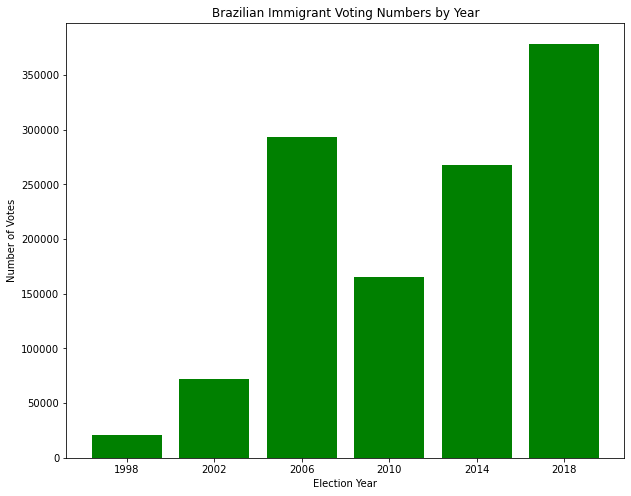

In [6]:
plot_total_votes(df_combined)

In [7]:
def plot_total_countries(df):
    '''
    Plots the Number of Countries in which the Electorate Resides by Year
    :param df - A pandas dataframe containing electorate data with all years labelled
    '''
    #Source for Bar Chart- https://www.pythoncharts.com/matplotlib/beautiful-bar-charts-matplotlib/
    
    #Gets Number of Unique Countries by Year
    countries = df[["election_year", "municipality_code"]].groupby("election_year").nunique()

    
    # Set default figure size.
    plt.rcParams['figure.figsize'] = (10,8)
    
    #Plot Graph
    plt.bar(
        x=np.arange(countries.size),
        height=countries["municipality_code"],
        tick_label=countries.index, 
        color = 'b'
    )
    
    #Add Labels and Title
    plt.xlabel("Election Year")
    plt.ylabel("Unique Country Count")
    plt.title("NUmber of Countries that saw Brazilian immigrants vote by Year")

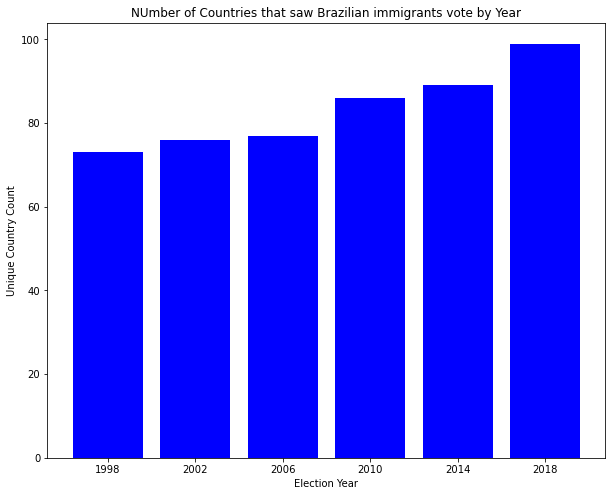

In [8]:
plot_total_countries(df_combined)

In [9]:
def calculate_country_pop(df):
    '''
    Determines Population among different countries over the 6 datasets
    :param df - A pandas dataframe containing electorate data 
    :return - A Dataframe containing the country populations
    '''
    
    #Combine all voters by municipality code, country name, and year
    countries = df.groupby(["municipality_code", "municipality_name", "election_year"]).number_of_votes.sum().unstack()
    
    #Fills Nans with 0's
    countries = countries.fillna(0)
    
    
    return countries

In [10]:
countries = calculate_country_pop(df_combined)

In [11]:
countries1 = countries.sort_values(by=[1998], ascending=False)
countries1.head(10)

,election_year,1998,2002,2006,2010,2014,2018
municipality_code,municipality_name,,,,,,
11266,ESTADOS UNIDOS,4345.0,26772.0,97985.0,51820.0,75862.0,107078.0
11363,ITALIA,1940.0,4518.0,16616.0,10564.0,12943.0,15519.0
11509,PORTUGAL,1502.0,7343.0,27822.0,15087.0,19295.0,24980.0
11100,ALEMANHA,1359.0,2584.0,9750.0,6119.0,11780.0,16996.0
11800,BOLIVIA,1115.0,1562.0,4699.0,1935.0,2462.0,3080.0
98906,CANADA,911.0,2196.0,11214.0,7749.0,13819.0,23852.0
11525,SUICA,905.0,1469.0,7310.0,7357.0,11771.0,15620.0
11282,FRANCA,881.0,2038.0,8661.0,3895.0,6227.0,8732.0
11320,GUIANA FRANCESA,753.0,1653.0,7856.0,3454.0,3564.0,3025.0


In [12]:
countries2 = countries.sort_values(by=[2002], ascending=False)
countries2.head(10)

,election_year,1998,2002,2006,2010,2014,2018
municipality_code,municipality_name,,,,,,
11266,ESTADOS UNIDOS,4345.0,26772.0,97985.0,51820.0,75862.0,107078.0
11509,PORTUGAL,1502.0,7343.0,27822.0,15087.0,19295.0,24980.0
11363,ITALIA,1940.0,4518.0,16616.0,10564.0,12943.0,15519.0
98841,INGLATERRA,590.0,3217.0,12640.0,6192.0,11627.0,17848.0
11100,ALEMANHA,1359.0,2584.0,9750.0,6119.0,11780.0,16996.0
98906,CANADA,911.0,2196.0,11214.0,7749.0,13819.0,23852.0
11282,FRANCA,881.0,2038.0,8661.0,3895.0,6227.0,8732.0
11320,GUIANA FRANCESA,753.0,1653.0,7856.0,3454.0,3564.0,3025.0
11800,BOLIVIA,1115.0,1562.0,4699.0,1935.0,2462.0,3080.0


In [13]:
countries3 = countries.sort_values(by=[2006], ascending=False)
countries3.head(10)

,election_year,1998,2002,2006,2010,2014,2018
municipality_code,municipality_name,,,,,,
11266,ESTADOS UNIDOS,4345.0,26772.0,97985.0,51820.0,75862.0,107078.0
11509,PORTUGAL,1502.0,7343.0,27822.0,15087.0,19295.0,24980.0
11363,ITALIA,1940.0,4518.0,16616.0,10564.0,12943.0,15519.0
98841,INGLATERRA,590.0,3217.0,12640.0,6192.0,11627.0,17848.0
98906,CANADA,911.0,2196.0,11214.0,7749.0,13819.0,23852.0
11444,PARAGUAI,458.0,1332.0,10047.0,4547.0,6769.0,8450.0
11100,ALEMANHA,1359.0,2584.0,9750.0,6119.0,11780.0,16996.0
11282,FRANCA,881.0,2038.0,8661.0,3895.0,6227.0,8732.0
11320,GUIANA FRANCESA,753.0,1653.0,7856.0,3454.0,3564.0,3025.0


In [14]:
countries4 = countries.sort_values(by=[2010], ascending=False)
countries4.head(10)

,election_year,1998,2002,2006,2010,2014,2018
municipality_code,municipality_name,,,,,,
11266,ESTADOS UNIDOS,4345.0,26772.0,97985.0,51820.0,75862.0,107078.0
11509,PORTUGAL,1502.0,7343.0,27822.0,15087.0,19295.0,24980.0
11380,JAPAO,254.0,532.0,1666.0,12063.0,42402.0,59676.0
11363,ITALIA,1940.0,4518.0,16616.0,10564.0,12943.0,15519.0
98906,CANADA,911.0,2196.0,11214.0,7749.0,13819.0,23852.0
11525,SUICA,905.0,1469.0,7310.0,7357.0,11771.0,15620.0
98841,INGLATERRA,590.0,3217.0,12640.0,6192.0,11627.0,17848.0
11100,ALEMANHA,1359.0,2584.0,9750.0,6119.0,11780.0,16996.0
11142,ARGENTINA,424.0,1088.0,7732.0,4577.0,5431.0,6856.0


In [15]:
countries5 = countries.sort_values(by=[2014], ascending=False)
countries5.head(10)

,election_year,1998,2002,2006,2010,2014,2018
municipality_code,municipality_name,,,,,,
11266,ESTADOS UNIDOS,4345.0,26772.0,97985.0,51820.0,75862.0,107078.0
11380,JAPAO,254.0,532.0,1666.0,12063.0,42402.0,59676.0
11509,PORTUGAL,1502.0,7343.0,27822.0,15087.0,19295.0,24980.0
98906,CANADA,911.0,2196.0,11214.0,7749.0,13819.0,23852.0
11363,ITALIA,1940.0,4518.0,16616.0,10564.0,12943.0,15519.0
11100,ALEMANHA,1359.0,2584.0,9750.0,6119.0,11780.0,16996.0
11525,SUICA,905.0,1469.0,7310.0,7357.0,11771.0,15620.0
98841,INGLATERRA,590.0,3217.0,12640.0,6192.0,11627.0,17848.0
11444,PARAGUAI,458.0,1332.0,10047.0,4547.0,6769.0,8450.0


In [16]:
countries6 = countries.sort_values(by=[2018], ascending=False)
countries6.head(10)

,election_year,1998,2002,2006,2010,2014,2018
municipality_code,municipality_name,,,,,,
11266,ESTADOS UNIDOS,4345.0,26772.0,97985.0,51820.0,75862.0,107078.0
11380,JAPAO,254.0,532.0,1666.0,12063.0,42402.0,59676.0
11509,PORTUGAL,1502.0,7343.0,27822.0,15087.0,19295.0,24980.0
98906,CANADA,911.0,2196.0,11214.0,7749.0,13819.0,23852.0
98841,INGLATERRA,590.0,3217.0,12640.0,6192.0,11627.0,17848.0
11100,ALEMANHA,1359.0,2584.0,9750.0,6119.0,11780.0,16996.0
11525,SUICA,905.0,1469.0,7310.0,7357.0,11771.0,15620.0
11363,ITALIA,1940.0,4518.0,16616.0,10564.0,12943.0,15519.0
11240,ESPANHA,341.0,1547.0,5235.0,3853.0,6143.0,10937.0


In [17]:
def votes_by_party(df):
    countries = df.groupby(["party_name", "party_initials", "election_year"]).number_of_votes.sum().unstack()
    countries = countries.fillna(0)
    
    
    return countries

In [18]:
votings = votes_by_party(df_combined)
votings = votings.sort_values(by=[1998], ascending=False)
votings

,election_year,1998,2002,2006,2010,2014,2018
party_name,party_initials,,,,,,
PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,PSDB,13848.0,23960.0,153700.0,81846.0,169834.0,6668.0
PARTIDO DOS TRABALHADORES,PT,4885.0,39365.0,133996.0,64148.0,55412.0,73270.0
PARTIDO POPULAR SOCIALISTA,PPS,1407.0,4342.0,0.0,0.0,0.0,0.0
PARTIDO DA REEDIFICACAO DA ORDEM NACIONAL,PRONA,307.0,0.0,0.0,0.0,0.0,0.0
PARTIDO VERDE,PV,118.0,0.0,0.0,17222.0,2067.0,0.0
PARTIDO TRABALHISTA DO BRASIL,PT do B,86.0,0.0,0.0,0.0,0.0,0.0
PARTIDO TRABALHISTA NACIONAL,PTN,85.0,0.0,0.0,0.0,0.0,0.0
PARTIDO DA MOBILIZACAO NACIONAL,PMN,61.0,0.0,0.0,0.0,0.0,0.0
PARTIDO SOCIALISTA DOS TRABALHADORES UNIFICADO,PSTU,45.0,204.0,0.0,541.0,648.0,349.0


In [19]:
votings = votings.sort_values(by=[2002], ascending=False)
votings.head(10)

,election_year,1998,2002,2006,2010,2014,2018
party_name,party_initials,,,,,,
PARTIDO DOS TRABALHADORES,PT,4885.0,39365.0,133996.0,64148.0,55412.0,73270.0
PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,PSDB,13848.0,23960.0,153700.0,81846.0,169834.0,6668.0
PARTIDO POPULAR SOCIALISTA,PPS,1407.0,4342.0,0.0,0.0,0.0,0.0
PARTIDO SOCIALISTA BRASILEIRO,PSB,0.0,3675.0,0.0,0.0,34527.0,0.0
PARTIDO SOCIALISTA DOS TRABALHADORES UNIFICADO,PSTU,45.0,204.0,0.0,541.0,648.0,349.0
PARTIDO DA CAUSA OPERARIA,PCO,0.0,102.0,0.0,68.0,73.0,0.0
DEMOCRACIA CRISTA,DC,0.0,0.0,0.0,0.0,0.0,179.0
PARTIDO COMUNISTA BRASILEIRO,PCB,0.0,0.0,0.0,253.0,261.0,0.0
PARTIDO DEMOCRATICO TRABALHISTA,PDT,0.0,0.0,1822.0,0.0,0.0,28073.0


In [20]:
votings = votings.sort_values(by=[2006], ascending=False)
votings.head(10)

,election_year,1998,2002,2006,2010,2014,2018
party_name,party_initials,,,,,,
PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,PSDB,13848.0,23960.0,153700.0,81846.0,169834.0,6668.0
PARTIDO DOS TRABALHADORES,PT,4885.0,39365.0,133996.0,64148.0,55412.0,73270.0
PARTIDO SOCIALISMO E LIBERDADE,PSOL,0.0,0.0,3294.0,693.0,3474.0,1274.0
PARTIDO DEMOCRATICO TRABALHISTA,PDT,0.0,0.0,1822.0,0.0,0.0,28073.0
PARTIDO REPUBLICANO PROGRESSISTA,PRP,0.0,0.0,637.0,0.0,0.0,0.0
PARTIDO SOCIAL DEMOCRATA CRISTAO,PSDC,17.0,0.0,131.0,357.0,281.0,0.0
PARTIDO SOCIAL LIBERAL,PSL,0.0,0.0,129.0,0.0,0.0,245361.0
PARTIDO COMUNISTA BRASILEIRO,PCB,0.0,0.0,0.0,253.0,261.0,0.0
DEMOCRACIA CRISTA,DC,0.0,0.0,0.0,0.0,0.0,179.0


In [21]:
votings = votings.sort_values(by=[2010], ascending=False)
votings.head(10)

,election_year,1998,2002,2006,2010,2014,2018
party_name,party_initials,,,,,,
PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,PSDB,13848.0,23960.0,153700.0,81846.0,169834.0,6668.0
PARTIDO DOS TRABALHADORES,PT,4885.0,39365.0,133996.0,64148.0,55412.0,73270.0
PARTIDO VERDE,PV,118.0,0.0,0.0,17222.0,2067.0,0.0
PARTIDO SOCIALISMO E LIBERDADE,PSOL,0.0,0.0,3294.0,693.0,3474.0,1274.0
PARTIDO SOCIALISTA DOS TRABALHADORES UNIFICADO,PSTU,45.0,204.0,0.0,541.0,648.0,349.0
PARTIDO SOCIAL DEMOCRATA CRISTAO,PSDC,17.0,0.0,131.0,357.0,281.0,0.0
PARTIDO COMUNISTA BRASILEIRO,PCB,0.0,0.0,0.0,253.0,261.0,0.0
PARTIDO RENOVADOR TRABALHISTA BRASILEIRO,PRTB,0.0,0.0,0.0,200.0,436.0,0.0
PARTIDO DA CAUSA OPERARIA,PCO,0.0,102.0,0.0,68.0,73.0,0.0


In [22]:
votings = votings.sort_values(by=[2014], ascending=False)
votings.head(10)

,election_year,1998,2002,2006,2010,2014,2018
party_name,party_initials,,,,,,
PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,PSDB,13848.0,23960.0,153700.0,81846.0,169834.0,6668.0
PARTIDO DOS TRABALHADORES,PT,4885.0,39365.0,133996.0,64148.0,55412.0,73270.0
PARTIDO SOCIALISTA BRASILEIRO,PSB,0.0,3675.0,0.0,0.0,34527.0,0.0
PARTIDO SOCIALISMO E LIBERDADE,PSOL,0.0,0.0,3294.0,693.0,3474.0,1274.0
PARTIDO VERDE,PV,118.0,0.0,0.0,17222.0,2067.0,0.0
PARTIDO SOCIAL CRISTAO,PSC,23.0,0.0,0.0,0.0,906.0,0.0
PARTIDO SOCIALISTA DOS TRABALHADORES UNIFICADO,PSTU,45.0,204.0,0.0,541.0,648.0,349.0
PARTIDO RENOVADOR TRABALHISTA BRASILEIRO,PRTB,0.0,0.0,0.0,200.0,436.0,0.0
PARTIDO SOCIAL DEMOCRATA CRISTAO,PSDC,17.0,0.0,131.0,357.0,281.0,0.0


In [23]:
votings = votings.sort_values(by=[2018], ascending=False)
votings.head(10)

,election_year,1998,2002,2006,2010,2014,2018
party_name,party_initials,,,,,,
PARTIDO SOCIAL LIBERAL,PSL,0.0,0.0,129.0,0.0,0.0,245361.0
PARTIDO DOS TRABALHADORES,PT,4885.0,39365.0,133996.0,64148.0,55412.0,73270.0
PARTIDO DEMOCRATICO TRABALHISTA,PDT,0.0,0.0,1822.0,0.0,0.0,28073.0
PARTIDO NOVO,NOVO,0.0,0.0,0.0,0.0,0.0,13637.0
PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,PSDB,13848.0,23960.0,153700.0,81846.0,169834.0,6668.0
REDE SUSTENTABILIDADE,REDE,0.0,0.0,0.0,0.0,0.0,4961.0
PODEMOS,PODE,0.0,0.0,0.0,0.0,0.0,2733.0
PARTIDO SOCIALISMO E LIBERDADE,PSOL,0.0,0.0,3294.0,693.0,3474.0,1274.0
PATRIOTA,PATRI,0.0,0.0,0.0,0.0,0.0,1172.0


## Voting By Party
### All Datasets
Below, we can see the number of votes for each party over the 6 election years in the dataset. Overall, the PSDB and PT have received the most votes in the last 6 elections, with the PSL coming in 3rd.

<AxesSubplot:title={'center':'Votes by Party 1998-2018'}, xlabel='party_initials'>

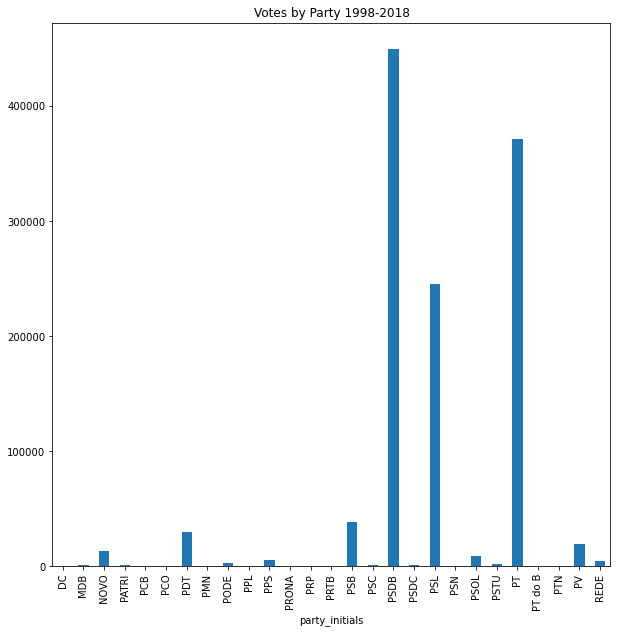

In [24]:
votings_overall = df_combined.groupby(["party_initials"]).number_of_votes.sum()
votings_overall.plot(kind="bar", figsize=(10,10), title="Votes by Party 1998-2018")

### Last 4 Elections
Now, if we narrow our focus to the last 4 elections, we can see that while the PSDB and PT were the top two parties in 2006-2014, the PSL emerged as the overwhelming top party in 2018

<AxesSubplot:title={'center':'2018'}, xlabel='party_initials'>

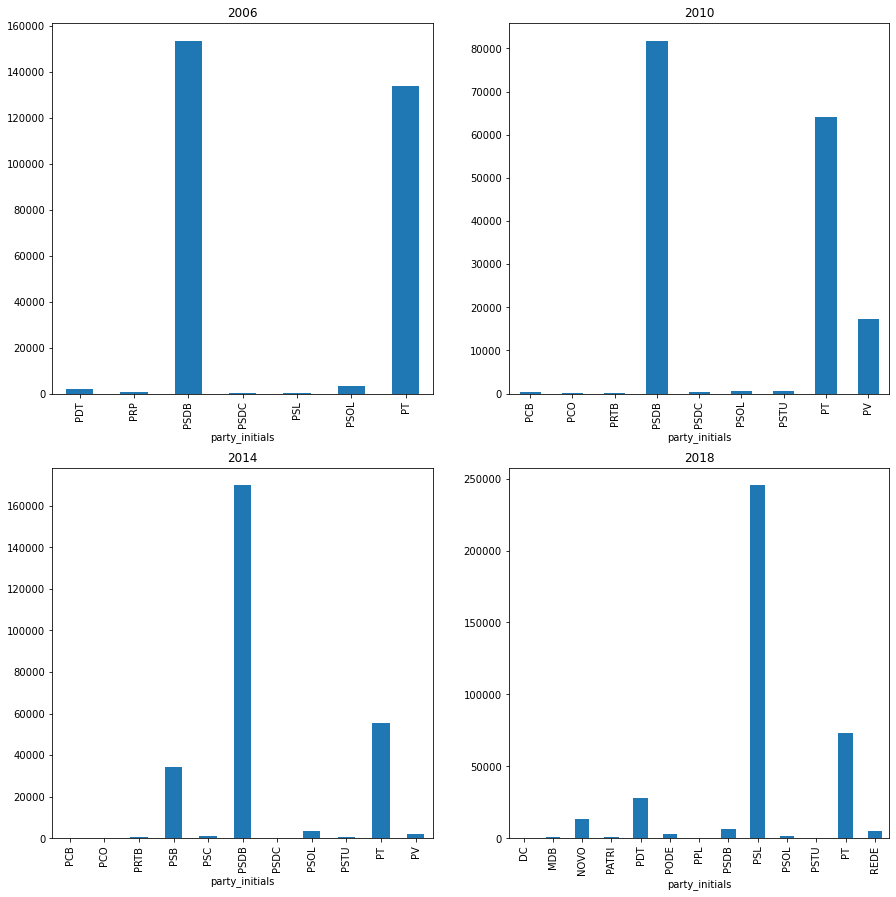

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))

df_combined[df_combined["election_year"] == 2006].groupby(["party_initials"]).number_of_votes.sum().plot(kind="bar", ax=axes[0][0], title="2006")
df_combined[df_combined["election_year"] == 2010].groupby(["party_initials"]).number_of_votes.sum().plot(kind="bar", ax=axes[0][1], title="2010")
df_combined[df_combined["election_year"] == 2014].groupby(["party_initials"]).number_of_votes.sum().plot(kind="bar", ax=axes[1][0], title="2014")
df_combined[df_combined["election_year"] == 2018].groupby(["party_initials"]).number_of_votes.sum().plot(kind="bar", ax=axes[1][1], title="2018")

## Analysis of Voting Patterns in Top 10 Countries

In [26]:
def get_electorate_data():
    '''
    Retrieves and combines electorate dataset (to get data on top 10 countries)
    :return: The combined electorate data
    '''
    df_1998 = pd.read_csv('../data/clean/perfil_eleitorado_1998.csv')
    df_2002 = pd.read_csv('../data/clean/perfil_eleitorado_2002.csv')
    df_2006 = pd.read_csv('../data/clean/perfil_eleitorado_2006.csv')
    df_2010 = pd.read_csv('../data/clean/perfil_eleitorado_2010.csv')
    df_2014 = pd.read_csv('../data/clean/perfil_eleitorado_2014.csv')
    df_2018 = pd.read_csv('../data/clean/perfil_eleitorado_2018.csv')
    
    df = combine_data(df_1998, df_2002, df_2006, df_2010, df_2014, df_2018)
    
    return df

In [27]:
def get_top_N(total_data, N:int):
    '''
    Extracts the top N countries (in terms of overall population) by 
    countries
    :param total_data - The aggregate dataset (df_combined in our case)
    :param sorted_countries - A sorted dataframe of dataset elements (in our case, elements
                              sorted by total number of voters in 2018)
    :param N - The number of countries to extract
    :return A new dataframe containing only the top N countries
    '''
    
    #Extract Names of top 10 countries
    electorate = get_electorate_data()
    countries = electorate.groupby(["municipality_code", "municipality_name", "election_year"]).quantity_of_voters.sum().unstack()
    countries = countries.fillna(0)
    sorted_countries = countries.sort_values(by=[2018], ascending=False)
    
    top_N_country_names = list(pd.DataFrame(sorted_countries.reset_index()).municipality_name[:N])
    
    #Filter dataframe to only include top 10 countries
    #Source - https://stackoverflow.com/questions/53342715/pandas-dataframe-select-rows-where-a-list-column-contains-any-of-a-list-of-strin
    top_N = total_data[pd.DataFrame(total_data["municipality_name"].tolist()).isin(top_N_country_names).any(1).values].reset_index()
    
    top_N = top_N[["election_year", "election_round","municipality_code","municipality_name", "office", "party_initials", "party_number","party_name", "number_of_votes" ]]

    
    return top_N

In [28]:
top_10 = get_top_N(df_combined, 10)
top_10.head()

,election_year,election_round,municipality_code,municipality_name,office,party_initials,party_number,party_name,number_of_votes
0,1998,1,11100,ALEMANHA,PRESIDENTE,PTN,19,PARTIDO TRABALHISTA NACIONAL,1
1,1998,1,11100,ALEMANHA,PRESIDENTE,PRONA,56,PARTIDO DA REEDIFICACAO DA ORDEM NACIONAL,1
2,1998,1,11100,ALEMANHA,PRESIDENTE,PPS,23,PARTIDO POPULAR SOCIALISTA,4
3,1998,1,11100,ALEMANHA,PRESIDENTE,PT,13,PARTIDO DOS TRABALHADORES,32
4,1998,1,11100,ALEMANHA,PRESIDENTE,PSDB,45,PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,56


### Below, we can see the total votes for each political party by country in our entire dataset

In [29]:
# top_10_votes = top_10.groupby(["party_name", "municipality_name", "election_year"]).number_of_votes.sum().unstack()
top_10_votes = top_10.groupby(["municipality_name", "party_initials","election_year"]).number_of_votes.sum().unstack()
top_10_votes = top_10_votes.fillna(0)
pd.set_option("display.max_rows", None, "display.max_columns", None)
top_10_votes

election_year                       1998     2002     2006     2010     2014  \
municipality_name party_initials                                               
ALEMANHA          DC                 0.0      0.0      0.0      0.0      0.0   
                  MDB                0.0      0.0      0.0      0.0      0.0   
                  NOVO               0.0      0.0      0.0      0.0      0.0   
                  PATRI              0.0      0.0      0.0      0.0      0.0   
                  PCB                0.0      0.0      0.0     18.0     13.0   
                  PCO                0.0      6.0      0.0     11.0      2.0   
                  PDT                0.0      0.0     63.0      0.0      0.0   
                  PMN                5.0      0.0      0.0      0.0      0.0   
                  PODE               0.0      0.0      0.0      0.0      0.0   
                  PPL                0.0      0.0      0.0      0.0      0.0   
                  PPS               90.0    109.0      0.0      0.0      0.0   
                  PRONA             16.0      0.0      0.0      0.0      0.0   
                  PRP                0.0      0.0     25.0      0.0      0.0   
                  PRTB               0.0      0.0      0.0      9.0     24.0   
                  PSB                0.0     42.0      0.0      0.0   1885.0   
                  PSC                0.0      0.0      0.0      0.0     34.0   
                  PSDB             799.0    799.0   5204.0   2760.0   6152.0   
                  PSDC               1.0      0.0      4.0     18.0     14.0   
                  PSL                0.0      0.0      6.0      0.0      0.0   
                  PSN                3.0      0.0      0.0      0.0      0.0   
                  PSOL               0.0      0.0     96.0     26.0    282.0   
                  PSTU               4.0      4.0      0.0     29.0     33.0   
                  PT               417.0   1624.0   4352.0   2420.0   3171.0   
                  PT do B            8.0      0.0      0.0      0.0      0.0   
                  PTN                8.0      0.0      0.0      0.0      0.0   
                  PV                 8.0      0.0      0.0    828.0    170.0   
                  REDE               0.0      0.0      0.0      0.0      0.0   
CANADA            DC                 0.0      0.0      0.0      0.0      0.0   
                  MDB                0.0      0.0      0.0      0.0      0.0   
                  NOVO               0.0      0.0      0.0      0.0      0.0   
                  PATRI              0.0      0.0      0.0      0.0      0.0   
                  PCB                0.0      0.0      0.0      8.0     10.0   
                  PCO                0.0      2.0      0.0      2.0      0.0   
                  PDT                0.0      0.0    109.0      0.0      0.0   
                  PMN                2.0      0.0      0.0      0.0      0.0   
                  PODE               0.0      0.0      0.0      0.0      0.0   
                  PPL                0.0      0.0      0.0      0.0      0.0   
                  PPS               52.0     99.0      0.0      0.0      0.0   
                  PRONA              9.0      0.0      0.0      0.0      0.0   
                  PRP                0.0      0.0     12.0      0.0      0.0   
                  PRTB               0.0      0.0      0.0      8.0     17.0   
                  PSB                0.0     37.0      0.0      0.0   1700.0   
                  PSC                2.0      0.0      0.0      0.0     34.0   
                  PSDB             585.0    769.0   6816.0   4408.0   9167.0   
                  PSDC               0.0      0.0      4.0      8.0     15.0   
                  PSL                0.0      0.0      6.0      0.0      0.0   
                  PSOL               0.0      0.0    119.0     24.0    286.0   
                  PSTU               2.0      6.0      0.0     11.0      8.0   


### First, let's look at the total number of votes for these 10 countries by political party. As we can see below,  the PSDB has received the most votes from these countries, followed by the PT and PSL

<AxesSubplot:xlabel='party_initials'>

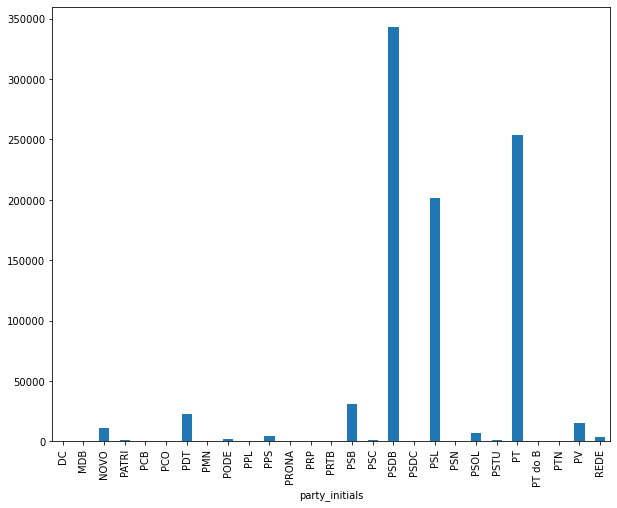

In [30]:
top_10_votes = top_10.groupby(["party_initials","municipality_name", "election_year"]).number_of_votes.sum().unstack()
top_10_votes = top_10_votes.fillna(0)
parties = top_10["party_initials"].unique()
top_10.groupby(["party_initials"]).number_of_votes.sum().plot(kind="bar")
# top_10_votes.groupby(["municipality_name"]).plot(legend=True, grid=True, figsize=(20,10))

#### Now, let's look at trend over the past 4 elections
Here, we can see that the PSDB received the most votes in 2006-2014, but received very few votes in 2018 (in which the PSL received the most votes)

<AxesSubplot:title={'center':'2018'}, xlabel='party_initials'>

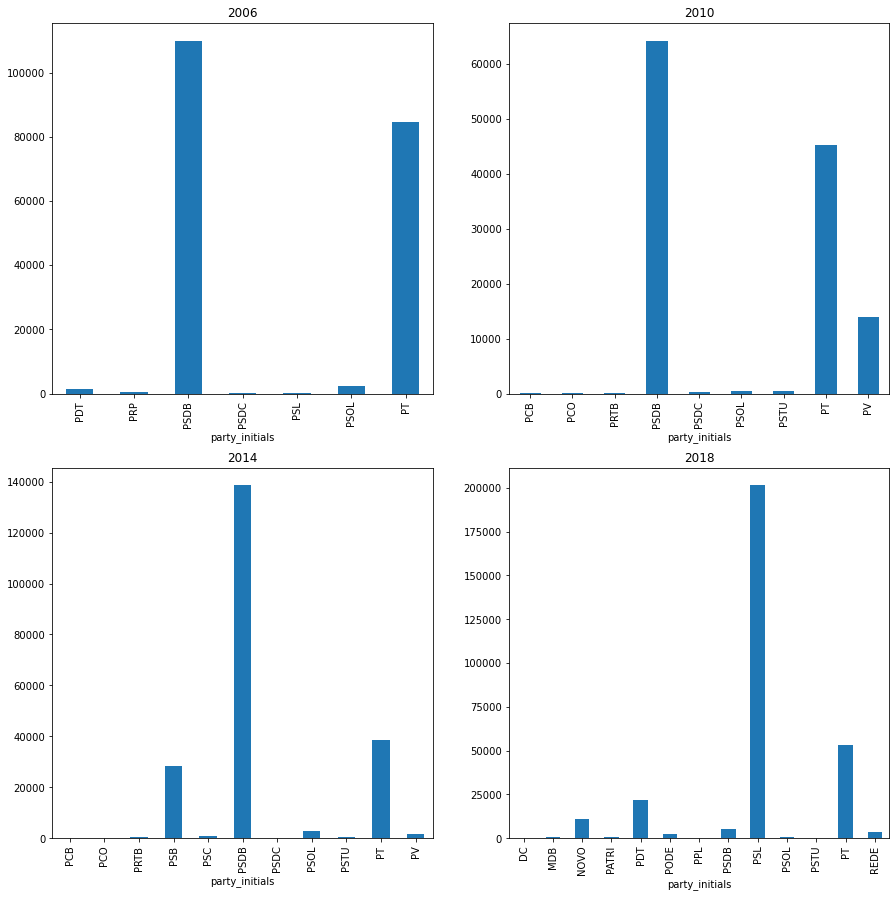

In [31]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))

top_10[top_10["election_year"] == 2006].groupby(["party_initials"]).number_of_votes.sum().plot(kind="bar", ax=axes[0][0], title="2006")
top_10[top_10["election_year"] == 2010].groupby(["party_initials"]).number_of_votes.sum().plot(kind="bar", ax=axes[0][1], title="2010")
top_10[top_10["election_year"] == 2014].groupby(["party_initials"]).number_of_votes.sum().plot(kind="bar", ax=axes[1][0], title="2014")
top_10[top_10["election_year"] == 2018].groupby(["party_initials"]).number_of_votes.sum().plot(kind="bar", ax=axes[1][1], title="2018")


#### Now, let's look at votes for the individual countries in these years



In [32]:
import math
def plot_top_10_voting_patterns(df_combined, top_10, years):
    '''
    Plots the voting patterns (by party) of the top 10 countries for the given years
    as a single plot
    :param df_combined -- The combined voting dataset
    :param top_10 -- The voting data for the top 10 countries
    :param years -- The election years to plot (a List)
    '''
    #Extract countries and parties
    countries = top_10.municipality_name.unique()
    
    #params for plot size
    num_cols = 2
    num_rows = math.ceil(len(years)/2)
    
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15,15))
    
    for idx, year in enumerate(years):
        
        row_idx, col_idx = divmod(idx, num_cols)
        
        #Extract Data for top 10 countries
        parties = top_10[(top_10["election_year"] == year)].party_initials.unique()
        parties.sort()
        votes = [0 for i in range(len(parties))]
        
        for country in countries:
            country_data = top_10[(top_10["election_year"] == year) & (top_10["municipality_name"]==country)]
            country_total_votes = country_data.number_of_votes.sum()
            for index, party in enumerate(parties):
                vote_total = country_data[country_data["party_initials"] == party].number_of_votes.sum()/country_total_votes
                votes[index] = vote_total
                
            axes[row_idx][col_idx].plot(parties, votes, label=country)
            votes = [0 for i in range(len(parties))]
            
        #Plot proportion of votes for total dataset
        full_data= df_combined[(df_combined["election_year"] == year)]
        votes = [0 for i in range(len(parties))]
        total_votes_aggregate_data = full_data.number_of_votes.sum()
        
        for index, party in enumerate(parties):
            vote_total = full_data[full_data["party_initials"] == party].number_of_votes.sum()/total_votes_aggregate_data
            votes[index] = vote_total
    
        axes[row_idx][col_idx].plot(parties, votes, '--', label="All Countries")
        

        #set parameters for tick labels
        axes[row_idx][col_idx].tick_params(axis='x', which='major', labelsize=10)
        axes[row_idx][col_idx].tick_params(axis='y', which='major', labelsize=10)
        axes[row_idx][col_idx].legend(loc='best', prop={'size': 8})
        axes[row_idx][col_idx].set_xlabel("Party", fontsize=10)
        axes[row_idx][col_idx].set_ylabel("Proportion of Votes", fontsize=10)
        axes[row_idx][col_idx].set_title(str(year), fontsize=12)
    
    plt.tight_layout()
#     plt.savefig("../readme_images/top10_votes_2006-2018.png", facecolor='w')
        

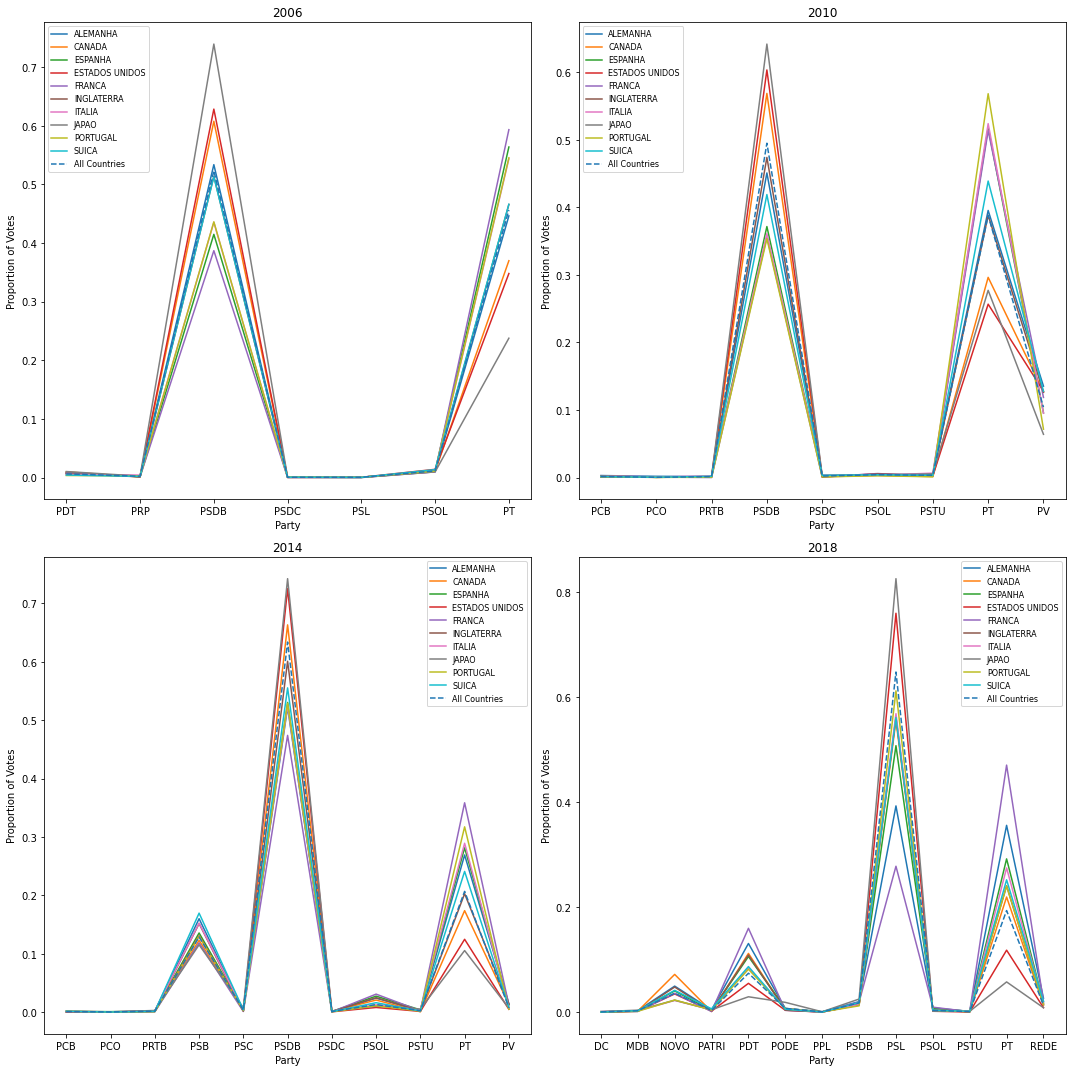

In [33]:
plot_top_10_voting_patterns(df_combined, top_10, [2006, 2010, 2014, 2018])

Above, we plot the voting patterns (in terms of which political party the electorate votes for) for country each country in the top 10 (as well as the aggregate dataset as a dashed line) for the years 2006-1018. These plots are discussed individually below.

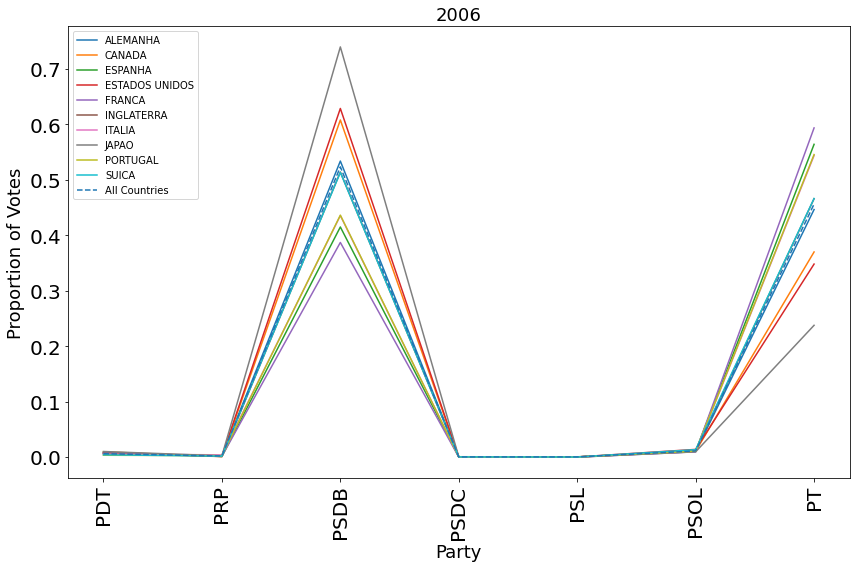

In [34]:
#========================
#2006 Analysis
# Analyze Proportion of Votes for each party in the top 10 countries (as well as proportion of votes overall)
#========================

#Extract countries and parties
countries = top_10.municipality_name.unique()
parties = top_10[(top_10["election_year"] == 2006)].party_initials.unique()
parties.sort()
votes = [0 for i in range(len(parties))]


#Plot proportion of votes for each country in top 10 countries
plt.figure(figsize=(12,8))
for country in countries:
    country_data = top_10[(top_10["election_year"] == 2006) & (top_10["municipality_name"]==country)]
    country_total_votes = country_data.number_of_votes.sum()
    for idx, party in enumerate(parties):
        vote_total = country_data[country_data["party_initials"] == party].number_of_votes.sum()/country_total_votes
        votes[idx] = vote_total
    
    plt.plot(parties, votes, label=country)
    votes = [0 for i in range(len(parties))]

#Plot proportion of votes for total dataset
full_data_2006 = df_combined[(df_combined["election_year"] == 2006)]
votes = [0 for i in range(len(parties))]
total_votes_aggregate_data = full_data_2006.number_of_votes.sum()
for idx, party in enumerate(parties):
    vote_total = full_data_2006[full_data_2006["party_initials"] == party].number_of_votes.sum()/total_votes_aggregate_data
    votes[idx] = vote_total
    
plt.plot(parties, votes, '--', label="All Countries")

    
plt.xticks(parties, [str(i) for i in parties], rotation=90)

#set parameters for tick labels
plt.tick_params(axis='x', which='major', labelsize=20)
plt.tick_params(axis='y', which='major', labelsize=20)
plt.legend(loc='best', prop={'size': 10})
plt.xlabel("Party", fontsize=18)
plt.ylabel("Proportion of Votes", fontsize=18)
plt.title("2006", fontsize=18)
plt.tight_layout()
# plt.savefig("../readme_images/Top_10_Voting/top10_votes_2006.png", facecolor='w')

#### 2006
Above, we plot the voting results for each country for the year 2006. We see a relatively uniform pattern among all countries, with the majority of votes going to the PDSB and PT. Interestingly, a the PT seemed to garner more votes in Portugal, Italy, and France than did the PSDB. Looking at all countries in the dataset (the dashed line), we can see the patterns from these top 10 countries follow roughly the same shape (though Japan, the US, and Canada have a higher proportion of votes for the PSDB than the dataset average and the other countries have a higher proportion of votes for the PT)

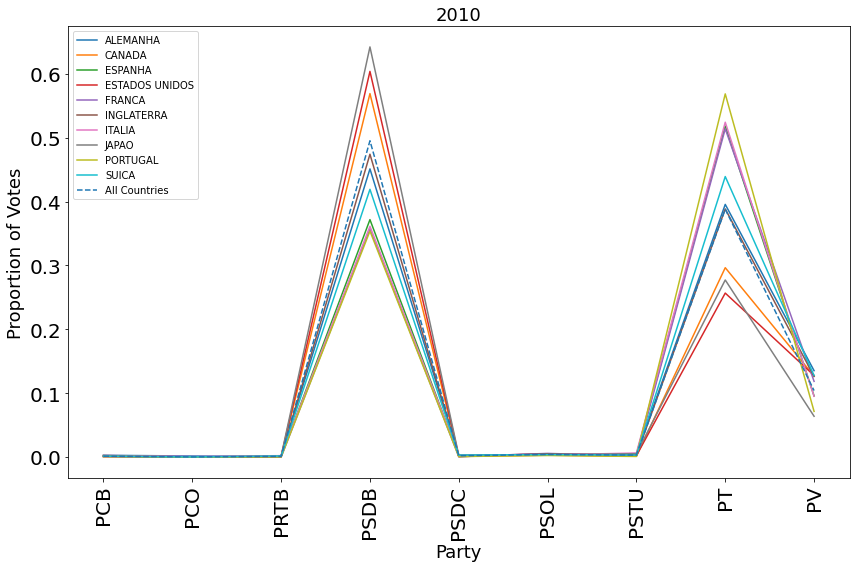

In [35]:
#========================
#2010 Analysis
# Analyze Proportion of Votes for each party in the top 10 countries (as well as proportion of votes overall)
#========================

#Extract countries and parties
countries = top_10.municipality_name.unique()
parties = top_10[(top_10["election_year"] == 2010)].party_initials.unique()
parties.sort()
votes = [0 for i in range(len(parties))]


#Plot proportion of votes for each country in top 10 countries
plt.figure(figsize=(12,8))
for country in countries:
    country_data = top_10[(top_10["election_year"] == 2010) & (top_10["municipality_name"]==country)]
    country_total_votes = country_data.number_of_votes.sum()
    for idx, party in enumerate(parties):
        vote_total = country_data[country_data["party_initials"] == party].number_of_votes.sum()/country_total_votes
        votes[idx] = vote_total
    
    plt.plot(parties, votes, label=country)
    votes = [0 for i in range(len(parties))]

#Plot proportion of votes for total dataset
full_data_2010 = df_combined[(df_combined["election_year"] == 2010)]
votes = [0 for i in range(len(parties))]
total_votes_aggregate_data = full_data_2010.number_of_votes.sum()
for idx, party in enumerate(parties):
    vote_total = full_data_2010[full_data_2010["party_initials"] == party].number_of_votes.sum()/total_votes_aggregate_data
    votes[idx] = vote_total
    
plt.plot(parties, votes, '--', label="All Countries")

    
plt.xticks(parties, [str(i) for i in parties], rotation=90)

#set parameters for tick labels
plt.tick_params(axis='x', which='major', labelsize=20)
plt.tick_params(axis='y', which='major', labelsize=20)
plt.legend(loc='best', prop={'size': 10})
plt.xlabel("Party", fontsize=18)
plt.ylabel("Proportion of Votes", fontsize=18)
plt.title("2010", fontsize=18)
plt.tight_layout()
# plt.savefig("../readme_images/top10_votes_2010.png", facecolor='w')

#### 2010
Above, we plot the voting results for each country for the year 2010. Again, we see a relatively uniform pattern among all countries, with the majority of votes going to the PDSB and PT. Again, a the PT seemed to garner more votes in Portugal, Italy, and France than did the PSDB and interestingly, the PV garnered a significant number of votes in the US.

Looking at all countries in the dataset (the dashed line), again, we can see the patterns from these top 10 countries follow roughly the same shape (though Japan, the US, and Canada have a higher proportion of votes for the PSDB than the dataset average and the other countries have a higher proportion of votes for the PT)

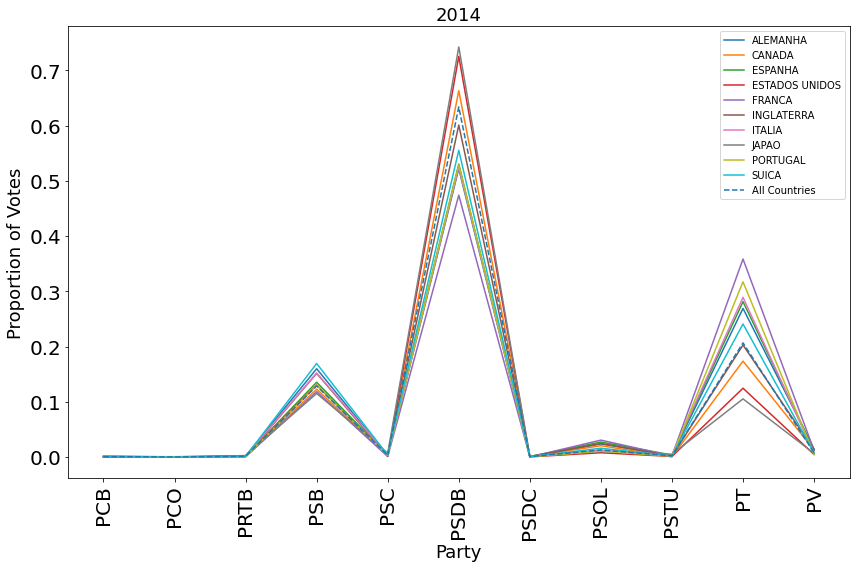

In [36]:
#========================
#2014 Analysis
# Analyze Proportion of Votes for each party in the top 10 countries (as well as proportion of votes overall)
#========================

#Extract countries and parties
countries = top_10.municipality_name.unique()
parties = top_10[(top_10["election_year"] == 2014)].party_initials.unique()
parties.sort()
votes = [0 for i in range(len(parties))]


#Plot proportion of votes for each country in top 10 countries
plt.figure(figsize=(12,8))
for country in countries:
    country_data = top_10[(top_10["election_year"] == 2014) & (top_10["municipality_name"]==country)]
    country_total_votes = country_data.number_of_votes.sum()
    for idx, party in enumerate(parties):
        vote_total = country_data[country_data["party_initials"] == party].number_of_votes.sum()/country_total_votes
        votes[idx] = vote_total
    
    plt.plot(parties, votes, label=country)
    votes = [0 for i in range(len(parties))]

#Plot proportion of votes for total dataset
full_data_2014 = df_combined[(df_combined["election_year"] == 2014)]
votes = [0 for i in range(len(parties))]
total_votes_aggregate_data = full_data_2014.number_of_votes.sum()
for idx, party in enumerate(parties):
    vote_total = full_data_2014[full_data_2014["party_initials"] == party].number_of_votes.sum()/total_votes_aggregate_data
    votes[idx] = vote_total
    
plt.plot(parties, votes, '--', label="All Countries")

    
plt.xticks(parties, [str(i) for i in parties], rotation=90)

#set parameters for tick labels
plt.tick_params(axis='x', which='major', labelsize=20)
plt.tick_params(axis='y', which='major', labelsize=20)
plt.legend(loc='best', prop={'size': 10})
plt.xlabel("Party", fontsize=18)
plt.ylabel("Proportion of Votes", fontsize=18)
plt.title("2014", fontsize=18)
plt.tight_layout()
# plt.savefig("../readme_images/top10_votes_2014.png", facecolor='w')

#### 2014
In 2014, we see the number of votes for the PT fall dramatically (relative to the PSDB). Meanwhile, votes for the PSB have grown significantly, with the votes for the PSB on par with the PT in the US and votes for the PT outnumbering those for the PT in Japan. Again, we see that the overall voting pattern in the dataset roughly matches these top 10 countries

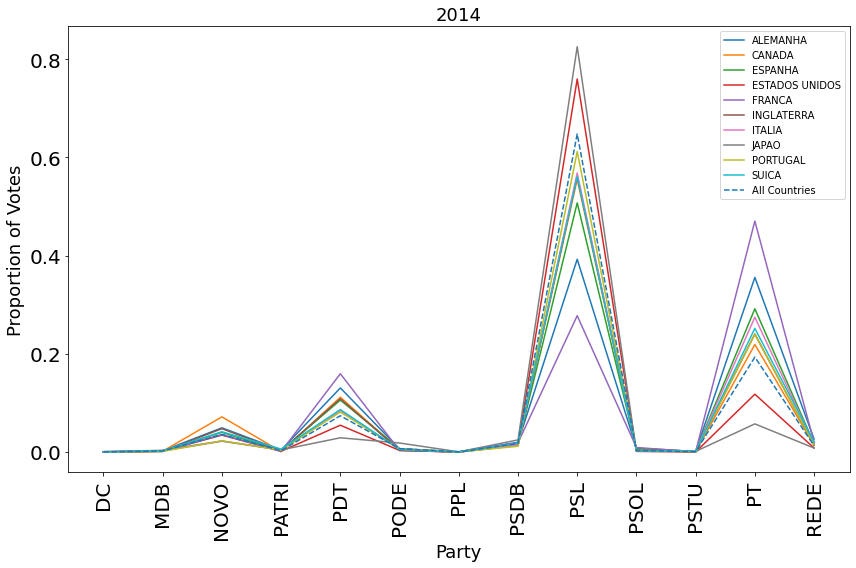

In [37]:
#========================
#2018 Analysis
# Analyze Proportion of Votes for each party in the top 10 countries (as well as proportion of votes overall)
#========================

#Extract countries and parties
countries = top_10.municipality_name.unique()
parties = top_10[(top_10["election_year"] == 2018)].party_initials.unique()
parties.sort()
votes = [0 for i in range(len(parties))]


#Plot proportion of votes for each country in top 10 countries
plt.figure(figsize=(12,8))
for country in countries:
    country_data = top_10[(top_10["election_year"] == 2018) & (top_10["municipality_name"]==country)]
    country_total_votes = country_data.number_of_votes.sum()
    for idx, party in enumerate(parties):
        vote_total = country_data[country_data["party_initials"] == party].number_of_votes.sum()/country_total_votes
        votes[idx] = vote_total
    
    plt.plot(parties, votes, label=country)
    votes = [0 for i in range(len(parties))]

#Plot proportion of votes for total dataset
full_data_2018 = df_combined[(df_combined["election_year"] == 2018)]
votes = [0 for i in range(len(parties))]
total_votes_aggregate_data = full_data_2018.number_of_votes.sum()
for idx, party in enumerate(parties):
    vote_total = full_data_2018[full_data_2018["party_initials"] == party].number_of_votes.sum()/total_votes_aggregate_data
    votes[idx] = vote_total
    
plt.plot(parties, votes, '--', label="All Countries")

    
plt.xticks(parties, [str(i) for i in parties], rotation=90)

#set parameters for tick labels
plt.tick_params(axis='x', which='major', labelsize=20)
plt.tick_params(axis='y', which='major', labelsize=20)
plt.legend(loc='best', prop={'size': 10})
plt.xlabel("Party", fontsize=18)
plt.ylabel("Proportion of Votes", fontsize=18)
plt.title("2014", fontsize=18)
plt.tight_layout()
# plt.savefig("../readme_images/top10_votes_2018.png", facecolor='w')

#### 2018
In 2018, the PSL became the most-voted-for party across almost all countries. We also see some small spikes in votes for the new NOVO and PDT parties. Meanwhile, the PSDB has very few votes in all countries, while the PT continues to have some support on par with 2014 (much reduced from 2006 and 2010). 

Interesting, while overall the shape of voting proportions the total dataset matches the shape of votes for only the top 10 countries, we can see that 8 out of the 10 top 10 countrues had a higher proportion of votes for the PDT  and PT (and lower proportion for the PSL) than the dataset average. Meanwhile, voters in Japan and the US were the opposite, with a higher proportion of votes for the PSL (and lower proportion for the PT and PDT) than the dataset average.

### Proportion of Electorate That Votes in Top 10 Countries - (Using  Data from Consulartes)
Below, we analyze the proportion of the electorate which votes in our top 10 countries for the years 2006 to 2018. Our estimations for the total size of the populations in 2006, 2010, and 2018 are based on data available (provided by country-level consulates) on the size of these populations in 2008, 2011, and 2020 respectively.

In [38]:
import math
from collections import defaultdict
def plot_top_10_voting_proportions_consulates(top_10, years, elect_round):
    '''
    Plots the voting patterns (by party) of the top 10 countries for the given years
    as a single plot
    :param df_combined -- The combined voting dataset
    :param top_10 -- The voting data for the top 10 countries
    :param years -- The election years to plot (a List)
    :param elect_round -- The election round 
    '''
    #Extract countries and parties
    countries = top_10.municipality_name.unique()
    
    #Extract Datasets with total country populations
    df_pop_2008 = pd.read_csv('../data/clean/PopTotal_2008.csv')
    df_pop_2011 = pd.read_csv('../data/clean/PopTotal_2011.csv')
    df_pop_2014 = pd.read_csv('../data/clean/PopTotal_2014.csv')
    df_pop_2020 = pd.read_csv('../data/clean/PopTotal_2020.csv')
    
    pop_datasets = [df_pop_2008, df_pop_2011, df_pop_2014, df_pop_2020]
    
    plt.figure(figsize=(12,8))

    
    #Iterate through each country and extract voting percentage by year
    for idx, country in enumerate(countries):

        #Voting proportion by Year
        voting_proportion = [0 for i in range(len(years))]
        
        # For each year, get total number of votes and country population
        # to calculate the percentage of the population that voted
        for index, year in enumerate(years):
            
            #Extract country voting Data
            country_data = top_10[(top_10["election_year"] == year) & (top_10["municipality_name"]==country)& (top_10["election_round"]==elect_round)]
            country_total_votes = country_data.number_of_votes.sum()
            
            #Extract country population data
            pop_dataset = pop_datasets[index]
            country_total_pop = pop_dataset[pop_dataset["country"]==country].total.sum()
            
            #Calculate proportion of population that voted
            prop_votes = (int(country_total_votes)/int(country_total_pop)) *100
            voting_proportion[index] = prop_votes

        #Plot Data      
        plt.plot(years, voting_proportion, label=country)
        

    plt.xticks(years, [str(year) for year in years])
    plt.tick_params(axis='x', which='major', labelsize=20)
    plt.tick_params(axis='y', which='major', labelsize=20)
    plt.legend(loc='best', prop={'size': 10})
    plt.xlabel("Year", fontsize=18)
    plt.ylabel("% of Total Population that Voted", fontsize=18)
    plt.title("Percentage of Estimated Total Population in Top 10 Countries that Voted (Round {})".format(elect_round), fontsize=18)
    plt.tight_layout()
    
    plt.tight_layout()
#     plt.savefig("../readme_images/Top_10_Voting/top_10_voting_percentage_round_{}_consulate.png".format(elect_round), facecolor='w')

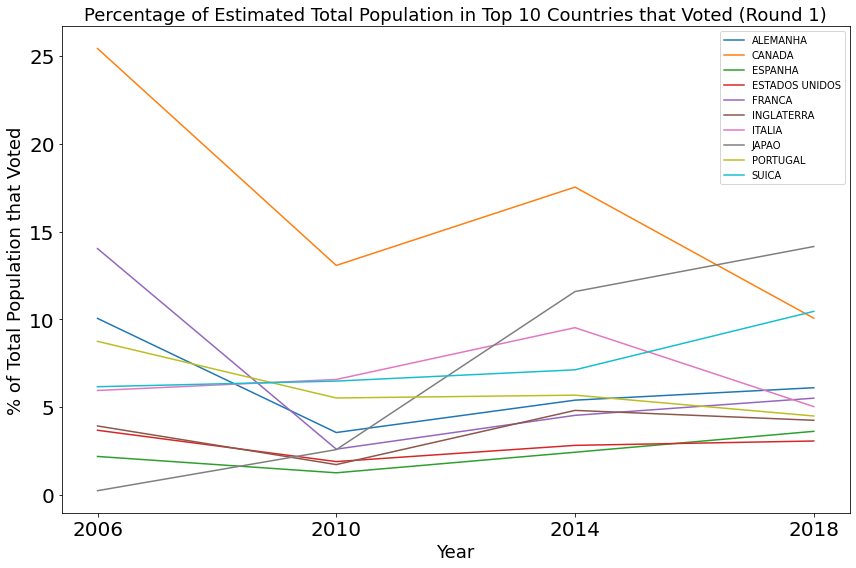

In [39]:
plot_top_10_voting_proportions_consulates(top_10, [2006, 2010, 2014, 2018], 1)

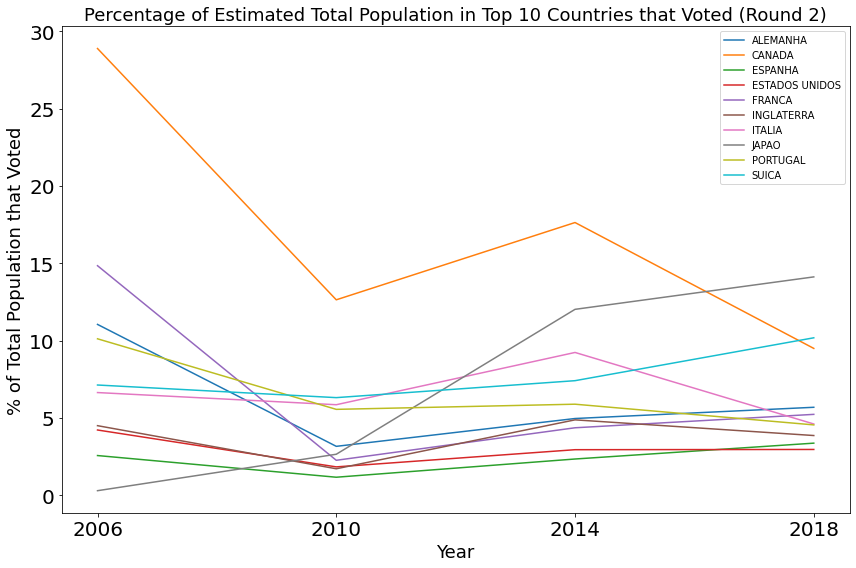

In [40]:
plot_top_10_voting_proportions_consulates(top_10, [2006, 2010, 2014, 2018], 2)

Above, we plot the percentage of the electorate population (based on estimates provided by consulates) which voted in rounds 1 and 2 of the 2006-2018 elections. There are a few key trends which immediately emerge:
* Overall, the percentage of the population which votes has been less than 20% in all years (except for in Canada, which had over 25% of its population vote in both round in 2006). 
* In the US, England, and Spain, the percentage of the population which voted around or less than 5% across all years analyzed.
* Voting in Japan (as a % of total population) has been increased in all years, with Japan having the highest percentage of voters (out of total population) in 2018.

### Proportion of Electorate That Votes in Top 10 Countries - (Using Electorate Data)
Below, we analyze the proportion of the electorate which votes in our top 10 countries for the years 2010-2018 when using the electorate data (with only voters with ages > 18) to estimate total population with a given country.

In [41]:
import math
from collections import defaultdict
def plot_top_10_voting_proportions_electorate(df_combined, top_10, elect_round):
    '''
    Plots the voting patterns (by party) of the top 10 countries for the given years
    as a single plot
    :param df_combined -- The combined voting dataset
    :param top_10 -- The voting data for the top 10 countries
    :param elect_round -- The election round 
    '''
    
    #Helper subroutine to filter out voters under the age of 18
    def filter_electorate_by_votinge_age(df):
        
        #Set of valid voting ages
        valid_ages = ["18 A 20 ANOS", 
                         "21 A 24 ANOS", 
                         "25 A 34 ANOS", 
                         "35 A 44 ANOS", 
                         "45 A 59 ANOS",
                         "60 A 69 ANOS",
                         "70 A 79 ANOS",
                         "SUPERIOR A ANOS",
                         ]
        
        df_filtered = df[df["age_group_description"].isin(valid_ages)]
        return df_filtered
    
    #Get Electorate Data and filter so that only persons aged > 18 are included
    electorate = get_electorate_data()
    electorate = filter_electorate_by_votinge_age(electorate)
    
    #Extract countries for top 10
    countries = top_10.municipality_name.unique()
    
    #Extract dataset years
    years = [2010, 2014, 2018]
    
    plt.figure(figsize=(12,8))

    
    #Iterate through each country and extract voting percentage by year
    for idx, country in enumerate(countries):

        #Voting proportion by Year
        voting_proportion = [0 for i in range(len(years))]
        
        # For each year, get total number of votes and country population
        # to calculate the percentage of the population that voted
        for index, year in enumerate(years):
            
            #Extract country voting Data
            country_data = top_10[(top_10["election_year"] == year) & (top_10["municipality_name"]==country)& (top_10["election_round"]==elect_round)]
            country_total_votes = country_data.number_of_votes.sum()
            
            #Extract electorate data
            pop_dataset = electorate[(electorate["election_year"] == year)& (electorate["municipality_name"]==country)]
            country_total_pop = pop_dataset.quantity_of_voters.sum()
            
            #Calculate proportion of population that voted
            prop_votes = (int(country_total_votes)/int(country_total_pop)) *100
            voting_proportion[index] = prop_votes

        #Plot Data      
        plt.plot(years, voting_proportion, label=country)
    
    #Add Trend line for Total Dataset
    voting_proportion_avg = [0 for i in range(len(years))]
    for index, year in enumerate(years):
        total_votes = df_combined[(df_combined["election_year"] == year) & (df_combined["election_round"]==elect_round)].number_of_votes.sum()
        electorate_pop = electorate[(electorate["election_year"] == year)].quantity_of_voters.sum()
        prop_votes = (int(total_votes)/int(electorate_pop)) *100
        voting_proportion_avg[index] = prop_votes
    
    #Plot dataset average
    plt.plot(years, voting_proportion_avg, '--', label="All Countries")
        

    plt.xticks(years, [str(year) for year in years])
    plt.tick_params(axis='x', which='major', labelsize=20)
    plt.tick_params(axis='y', which='major', labelsize=20)
    plt.legend(loc='best', prop={'size': 10})
    plt.xlabel("Year", fontsize=18)
    plt.ylabel("% of Total Population that Voted", fontsize=18)
    plt.title("Percentage of Electorate in Top 10 Countries that Voted (Round {})".format(elect_round), fontsize=18)
    plt.tight_layout()
    
    plt.tight_layout()
#     plt.savefig("../readme_images/Top_10_Voting/top_10_voting_percentage_round_{}_electorate.png".format(elect_round), facecolor='w')

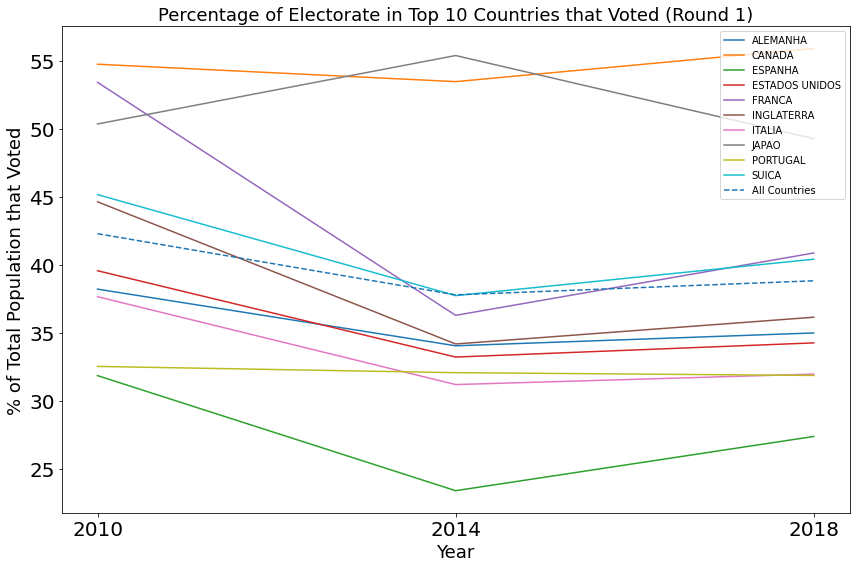

In [42]:
plot_top_10_voting_proportions_electorate(df_combined, top_10, 1)
# print(df_combined.head())

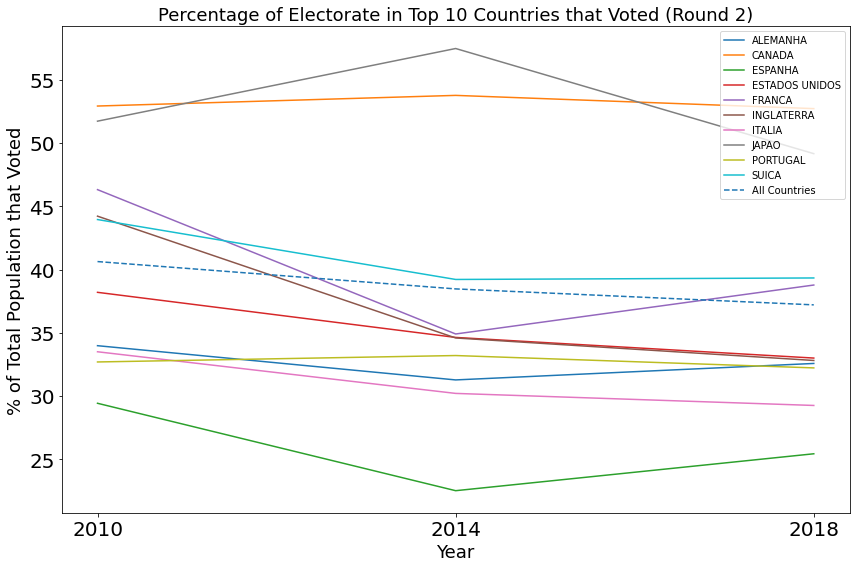

In [43]:
plot_top_10_voting_proportions_electorate(df_combined, top_10, 2)

Above, we plot the percentage of the electorate population (with the estimation for total population based on "quantity of voters" feature in the electorate datasets for members of the electorate who are over the age of 18) which voted in rounds 1 and 2 of the 2010-2018 elections. There are a couple of important takeways from this data:
* With this estimation, we can see that voters in Japan, Canada, and Switzerland tend to have a higher rate of voter turnout than the dataset average (which is around 40%).
* Meanwhile, voter turnout in the US and Italy is not only below average, but actually decreased in Round 2 for every year analyzed.
* Among the top 10 countries, Spain has the lowest voter turnout, with less than 35% of the electorate voting in either round across all 3 years

## Voting Percentage for Top 3 Parties (PT, PSDB, PSL) Over Time

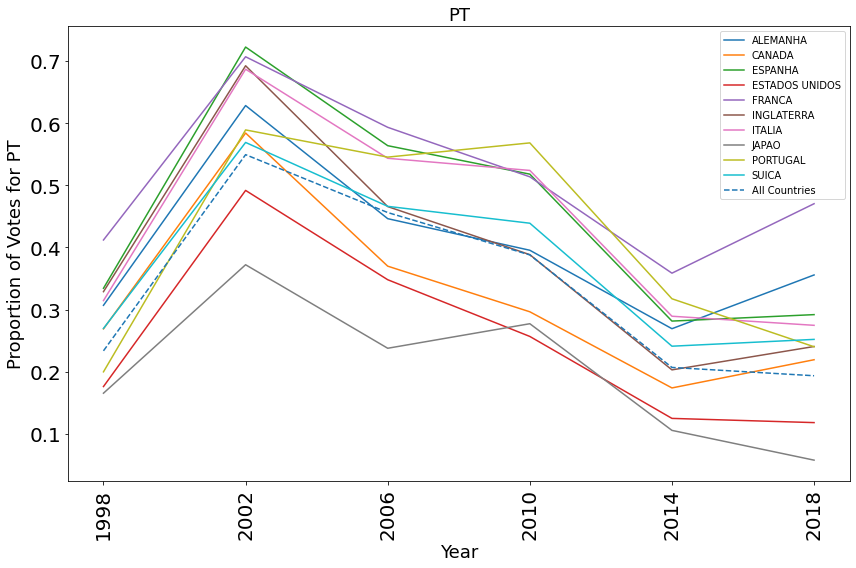

In [104]:
#========================
# Analysis for PT
#========================

#Extract countries and parties
countries = top_10.municipality_name.unique()
years = [1998, 2002, 2006, 2010, 2014, 2018]
party = 'PT'
votes = [0 for i in range(len(years))]

plt.figure(figsize=(12,8))
for country in countries:
    country_data = top_10[(top_10["municipality_name"] == country)]
    
    for idx, year in enumerate(years):
        PST_votes = country_data[(country_data["election_year"] == year) & \
                                 (country_data["party_initials"]==party)].number_of_votes.sum()
        country_total_votes = country_data[country_data["election_year"] == year].number_of_votes.sum() 
        votes[idx] = PST_votes/country_total_votes
    
    plt.plot(years, votes, label=country)
    votes = [0 for i in range(len(years))]
    
    
    
#Plot proportion of votes for total dataset
votes = [0 for i in range(len(years))]

for idx, year in enumerate(years):
    total_votes = df_combined[(df_combined["election_year"] == year)]
    PST_votes = total_votes[total_votes['party_initials'] == party].number_of_votes.sum()
    votes[idx] = PST_votes/total_votes.number_of_votes.sum()
    
plt.plot(years, votes, '--', label="All Countries")

    

# plot configurations
plt.xticks(years, [str(i) for i in years], rotation=90)
plt.tick_params(axis='x', which='major', labelsize=20)
plt.tick_params(axis='y', which='major', labelsize=20)
plt.legend()
plt.xlabel("Year", fontsize=18)
plt.ylabel("Proportion of Votes for PT", fontsize=18)
plt.title("PT", fontsize=18)
plt.tight_layout()



plt.savefig("../readme_images/Top_3_Parties/top3_votes_PT.png", facecolor='w')



We can see that the overall trend for PT is a sharp popularity spike in 2002, followed by gradual decrease in popularity before leveling off. Most of the countries follow this trend. What's interesting is that popularity for PT seems to have rebounded in France, Germany, and Canada in the recent years, even though whole its popularity is not increasing.

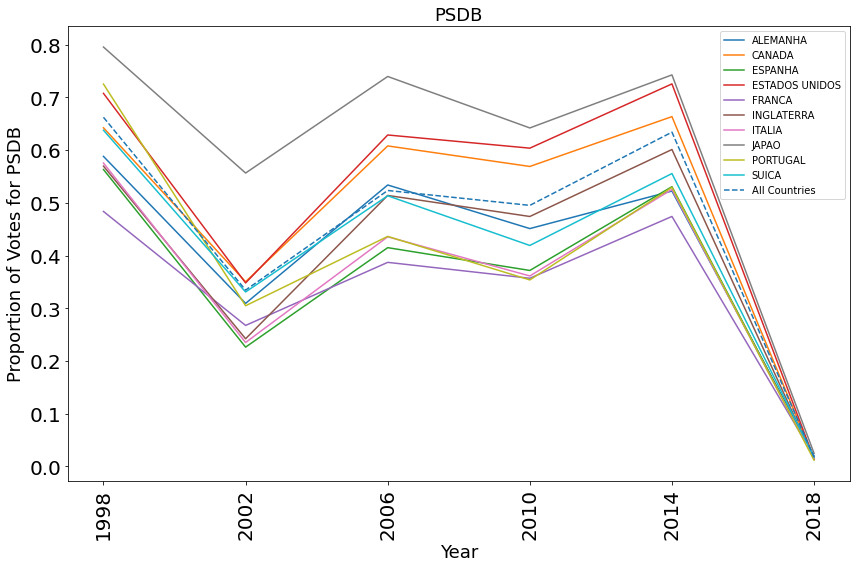

In [105]:
#========================
# Analysis for PSDB
#========================

#Extract countries and parties
countries = top_10.municipality_name.unique()
years = [1998, 2002, 2006, 2010, 2014, 2018]
party = 'PSDB'
votes = [0 for i in range(len(years))]

plt.figure(figsize=(12,8))
for country in countries:
    country_data = top_10[(top_10["municipality_name"] == country)]
    
    for idx, year in enumerate(years):
        PST_votes = country_data[(country_data["election_year"] == year) & \
                                 (country_data["party_initials"]==party)].number_of_votes.sum()
        country_total_votes = country_data[country_data["election_year"] == year].number_of_votes.sum() 
        votes[idx] = PST_votes/country_total_votes
    
    plt.plot(years, votes, label=country)
    votes = [0 for i in range(len(years))]
    
    
    
#Plot proportion of votes for total dataset
votes = [0 for i in range(len(years))]

for idx, year in enumerate(years):
    total_votes = df_combined[(df_combined["election_year"] == year)]
    PST_votes = total_votes[total_votes['party_initials'] == party].number_of_votes.sum()
    votes[idx] = PST_votes/total_votes.number_of_votes.sum()
    
plt.plot(years, votes, '--', label="All Countries")

    

# plot configurations
plt.xticks(years, [str(i) for i in years], rotation=90)
plt.tick_params(axis='x', which='major', labelsize=20)
plt.tick_params(axis='y', which='major', labelsize=20)
plt.legend()
plt.xlabel("Year", fontsize=18)
plt.ylabel("Proportion of Votes for PSDB", fontsize=18)
plt.title("PSDB", fontsize=18)
plt.tight_layout()



plt.savefig("../readme_images/Top_3_Parties/top3_votes_PSDB.png", facecolor='w')

For PSDB, we can see that initiall the popularity is high. During the early 2000s their popularity goes down, but it gradually recovers to almost its pre-drop heights in 2014. In 2018, the party's population goes down to essentially zero. This could be because the party disbanded or was merged with another party. All countries seem to follow this general trend, but its interesting to note that the population for PSDB is always slightly higher than average in certain countries such as Japan and the US. 

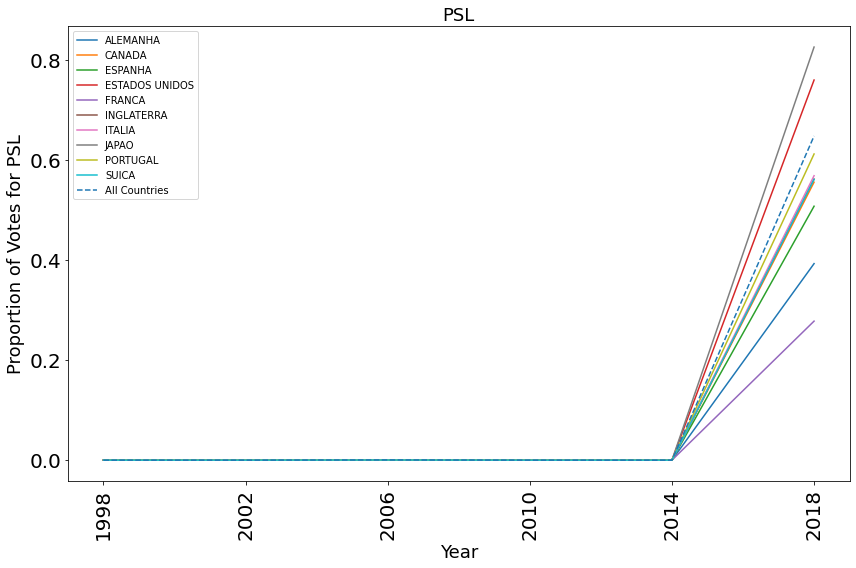

In [106]:
#========================
# Analysis for PSL
#========================

#Extract countries and parties
countries = top_10.municipality_name.unique()
years = [1998, 2002, 2006, 2010, 2014, 2018]
party = 'PSL'
votes = [0 for i in range(len(years))]

plt.figure(figsize=(12,8))
for country in countries:
    country_data = top_10[(top_10["municipality_name"] == country)]
    
    for idx, year in enumerate(years):
        PST_votes = country_data[(country_data["election_year"] == year) & \
                                 (country_data["party_initials"]==party)].number_of_votes.sum()
        country_total_votes = country_data[country_data["election_year"] == year].number_of_votes.sum() 
        votes[idx] = PST_votes/country_total_votes
    
    plt.plot(years, votes, label=country)
    votes = [0 for i in range(len(years))]
    
    
    
#Plot proportion of votes for total dataset
votes = [0 for i in range(len(years))]

for idx, year in enumerate(years):
    total_votes = df_combined[(df_combined["election_year"] == year)]
    PST_votes = total_votes[total_votes['party_initials'] == party].number_of_votes.sum()
    votes[idx] = PST_votes/total_votes.number_of_votes.sum()
    
plt.plot(years, votes, '--', label="All Countries")

    

# plot configurations
plt.xticks(years, [str(i) for i in years], rotation=90)
plt.tick_params(axis='x', which='major', labelsize=20)
plt.tick_params(axis='y', which='major', labelsize=20)
plt.legend()
plt.xlabel("Year", fontsize=18)
plt.ylabel("Proportion of Votes for PSL", fontsize=18)
plt.title("PSL", fontsize=18)
plt.tight_layout()



plt.savefig("../readme_images/Top_3_Parties/top3_votes_PSL.png", facecolor='w')



From this chart, we can see that PSL is a new party that became popular in 2018. Interestingly enough, it's popularity is low in France, Germany, and Spain when compared to the other countries.